### Assignment 3 - Option A - Programming

In [113]:
# In[0]: IMPORT AND FUNCTIONS
#region 
# pip install scikit-learn # to install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 
#endregion

# Import dataset into jupyter notebook file


In [114]:
raw_data = pd.read_csv(r'dataset/dataset_abalone.csv')

# Discover the data to gain insights

In [115]:
# In[3]: STEP 3. DISCOVER THE DATA TO GAIN INSIGHTS
#region
# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())              
print('\n____________ Some first data examples ____________')
print(raw_data.head(3)) 
print('\n____________ Counts on a feature ____________')
print(raw_data['Length'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())    
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

____________ Some first data examples ____________
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.048

### 3.2 Scatter plot b/w 2 features
    

- Scatter plot is used to visualize the relationship between Rings and Length

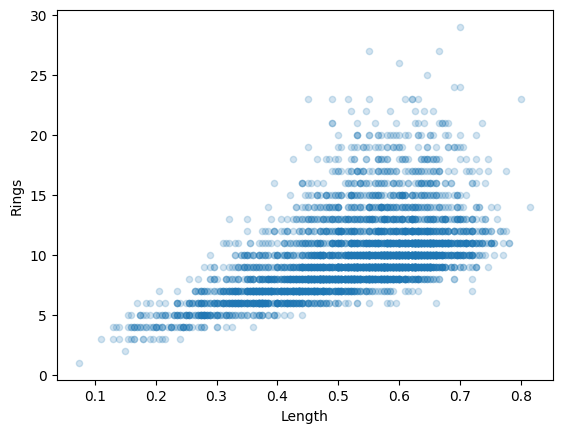

In [116]:
raw_data.plot(kind="scatter", y="Rings", x="Length", alpha=0.2)
plt.show()      

- Scatter plot is used to visualize the relationship between Rings and Height

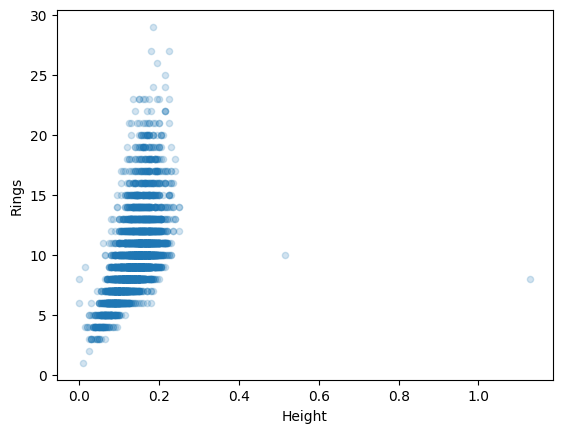

In [117]:
raw_data.plot(kind="scatter", y="Rings", x="Height", alpha=0.2)
plt.show()

### 3.3 Scatter plot b/w every pair of features

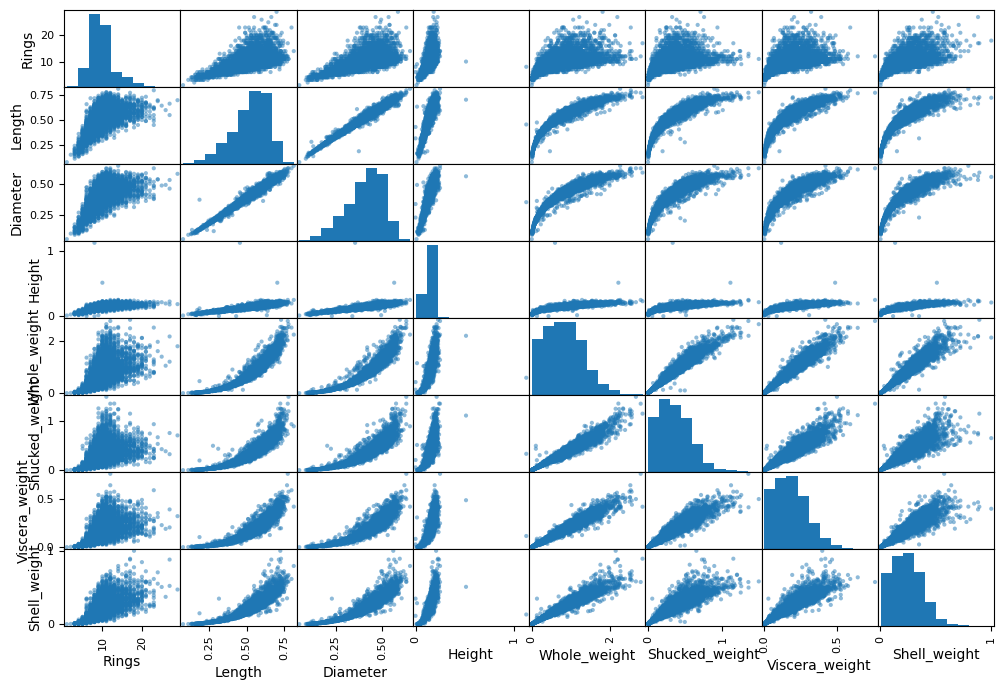

In [118]:
from pandas.plotting import scatter_matrix   
features_to_plot = ["Rings", "Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
plt.show()

### 3.4 Plot histogram of 1 feature

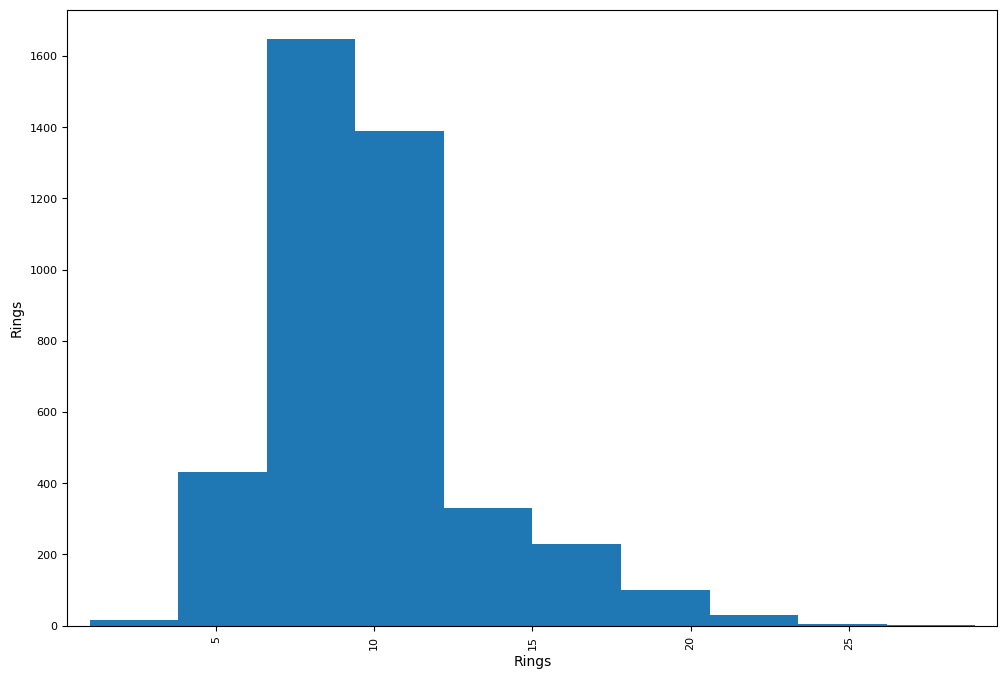

In [119]:
from pandas.plotting import scatter_matrix   
features_to_plot = ["Rings"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
plt.show()

### 3.5 Plot histogram of numeric features

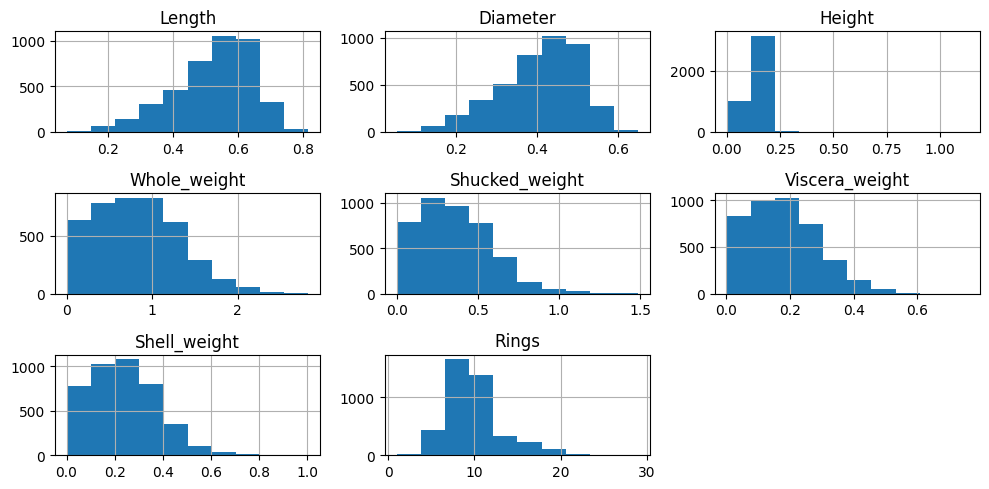

In [120]:
raw_data.hist(bins=10, figsize=(10,5)) #bins: no. of intervals
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.savefig('figures/hist_raw_data.png', format='png', dpi=300) # must save before show()
plt.show()

### 3.6 Compute correlations b/w features

In [121]:
corr_matrix = raw_data.corr(numeric_only=True)
# print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Rings"].sort_values(ascending=False)) # print correlation b/w a feature and other features


 Rings             1.000000
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Name: Rings, dtype: float64
